In [1]:
import pandas as pd
import numpy as np
from networkx import to_networkx_graph

sent_df = pd.read_csv('Assignment 3 Sentiment Scores.csv')
sent_df.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [2]:
## Aditya's sentiment review
def sentiment_review(review, brand_list):
    import re 
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()
    sent_score_fin = {}
    review = re.sub("\"", "", review)
    review = re.sub("\$+", " ", review)
    for item in brand_list:
        iter = re.finditer(item, review)
        if iter:
            sentiment = []
            for m in iter:
                sentence = review[max(0, m.start(0)-70):min((m.start(0) + len(item)+70), len(review))]
                ss = sid.polarity_scores(str(sentence))
                sentiment.append(ss['compound'])
            if sentiment:
                sent_score_fin[item] = np.mean(sentiment)
            else:
                sent_score_fin[item] = np.nan
    return sent_score_fin

In [3]:
def sentiment_score(reviews_data, brand_list):
    sent_scores = {}
    for item in brand_list:
        sent_scores[item] = list()
    for review_id in range(0, len(reviews_data)):
        sent_values = sentiment_review(reviews_data.iloc[review_id, 0], brand_list)
        for item in brand_list:
            sent_scores[item].append(sent_values[item])
    fin = pd.DataFrame.from_dict(sent_scores, orient='columns')
    fin.to_csv('Sentiment_Scores.csv', index=False)
    return sent_scores

In [7]:

def form_network(edge_list):
    
    import networkx as nx
    import pylab 
    directed_graph = nx.DiGraph()
    directed_graph.add_weighted_edges_from(edge_list, weight = 'weight')
    nx.draw(directed_graph)
    pylab.show()
    
    pagerank_unweighted = nx.pagerank(directed_graph, alpha=0.99, weight=1)
    
    print(pagerank_unweighted)
    print(len(pagerank_unweighted))
    return pagerank_unweighted 

In [8]:

def create_edges(sent_scores):
    
    edge_list = []
    brand_list = list(sent_scores.keys())
    for x in range(0, len(brand_list)):
        for y in range(x+1, len(brand_list)):
            positive_sent = []
            negative_sent = []
            for i in range(0, len(sent_scores[brand_list[0]])):
                sent_x = sent_scores[brand_list[x]][i]
                sent_y = sent_scores[brand_list[y]][i]
                if ((not(np.isnan(sent_x))) & (not(np.isnan(sent_x)))):
                    edge_weight = sent_x - sent_y
                    if edge_weight >=0:
                        positive_sent.append(edge_weight)
                    else:
                        negative_sent.append(edge_weight)
            if len(positive_sent) >0:
                edge_list.append([brand_list[x],brand_list[y],np.mean(positive_sent)])
            if len(negative_sent) >0:
                edge_list.append([brand_list[x],brand_list[y],abs(np.mean(negative_sent))])
    return edge_list

C:\Python\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Python\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Python\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Python\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


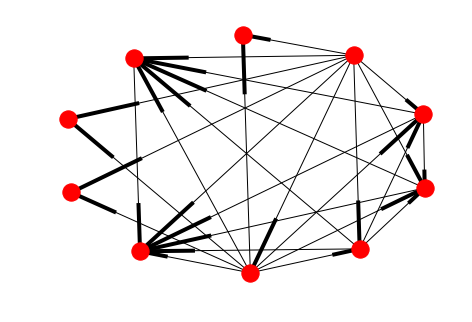

{'A6': 0.05005932068768495, 'A8': 0.05556592670174315, '3-series': 0.062442283076612294, '5-series': 0.062442283076612294, '7-series': 0.062442283076612294, 'XJ': 0.062442283076612294, 'ES': 0.07789683885489332, 'LS': 0.1036027372346739, 'RX': 0.15488558692191395, 'S-class': 0.30822045729264147}
10


In [9]:
reviews_data = pd.read_excel('Edmunds Reviews.xlsx', encoding = 'latin1')
brand_list = ['A6','A8','3-series','5-series','7-series','XJ','ES','LS','RX','S-class']
sentiment_scores = sentiment_score(reviews_data, brand_list)
edge_list = create_edges(sentiment_scores)
pagerank = form_network(edge_list)

In [23]:
## With final assignment, model_price is data['Sales']
model_price = [20, 12, 220, 60, 14, 6.6, 135, 30, 120, 25] # Got from assignement
pageranks = list(pagerank.values())

# Get correlation coeff
np.corrcoef(pageranks, model_price)[0, 1]
# np.corrcoef(pageranks, data['Sales'])

-0.076592924171501861

In [ ]:
## The unsurpvisied apporach to calculate pagerank yields a very similair correlation to the manual scoring in part B.